<a href="https://colab.research.google.com/github/Integraloflnx/Pokemon_Project/blob/main/pokemon_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Needed Packages**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot

**Read in the Data**

In [56]:
attributes_list = ["weight_kg", "type1", "hp", "attack", "defense", "speed", "generation"]

#Read the data in from github and create a dataframe with the specified attributes, we limit our data to generation 1 pokemon
generation_boolean_condition = ["generation"] == 1
url = "https://github.com/Integraloflnx/Pokemon_Project/blob/main/data/pokemon.csv?raw=true"
pokemon = pd.read_csv(url, index_col = "name")[(pd.read_csv(url, index_col = "name")["generation"] == 1) | (pd.read_csv(url, index_col = "name")["generation"] == 2)][attributes_list]

pokemon.tail()

,weight_kg,type1,hp,attack,defense,speed,generation
name,,,,,,,
Pupitar,152.0,rock,70,84,70,51,2
Tyranitar,202.0,rock,100,164,150,71,2
Lugia,216.0,psychic,106,90,130,110,2
Ho-Oh,199.0,fire,106,130,90,90,2
Celebi,5.0,psychic,100,100,100,100,2


**Handling Missing Values**

In [57]:
#Determine if there are any missing values in the data set
print(pokemon.isna().sum())

#As weight is our response variable we will exclude these points from the dataset
pokemon.dropna(inplace =  True)

#Doublecheck to ensure we have no missing values
print(pokemon.isna().sum())

weight_kg     18
type1          0
hp             0
attack         0
defense        0
speed          0
generation     0
dtype: int64
weight_kg     0
type1         0
hp            0
attack        0
defense       0
speed         0
generation    0
dtype: int64


**Determining the Shape of the Data**

In [58]:
#Determine how many data points there are
print("(rows, columns): ", pokemon.shape)

(rows, columns):  (233, 7)


**Create an Indicator Variable for When a Pokemon is of Type Rock**

In [60]:
#Create an indicator variable called is_rock determining whether or not a pokemon's type is rock
pokemon["is_rock"] = (pokemon["type1"] == "rock").astype(int)
print(pokemon.tail())
print("\n")

#Count the number of rock and non-rock pokemon
rock_count = pokemon["is_rock"].value_counts()
print(rock_count)

           weight_kg    type1   hp  attack  defense  speed  generation  \
name                                                                     
Pupitar        152.0     rock   70      84       70     51           2   
Tyranitar      202.0     rock  100     164      150     71           2   
Lugia          216.0  psychic  106      90      130    110           2   
Ho-Oh          199.0     fire  106     130       90     90           2   
Celebi           5.0  psychic  100     100      100    100           2   

           is_rock  
name                
Pupitar          1  
Tyranitar        1  
Lugia            0  
Ho-Oh            0  
Celebi           0  


0    223
1     10
Name: is_rock, dtype: int64


**Drop Unwanted Columns**

In [ ]:
#Drop the type1 and generation column
pokemon.drop(columns = ["type1", "generation"], inplace = True)
pokemon.tail()

,weight_kg,hp,attack,defense,speed,is_rock
name,,,,,,
Pupitar,152.0,70,84,70,51,1
Tyranitar,202.0,100,164,150,71,1
Lugia,216.0,106,90,130,110,0
Ho-Oh,199.0,106,130,90,90,0
Celebi,5.0,100,100,100,100,0


**Obtain Summary Statistics**

In [54]:
#We now obtain summary statistics for weight
summary_statistics = pokemon["weight_kg"].agg([np.mean, np.median, np.std, np.max, np.min])
summary_statistics

mean       47.234335
median     29.000000
std        61.111724
amax      460.000000
amin        0.100000
Name: weight_kg, dtype: float64

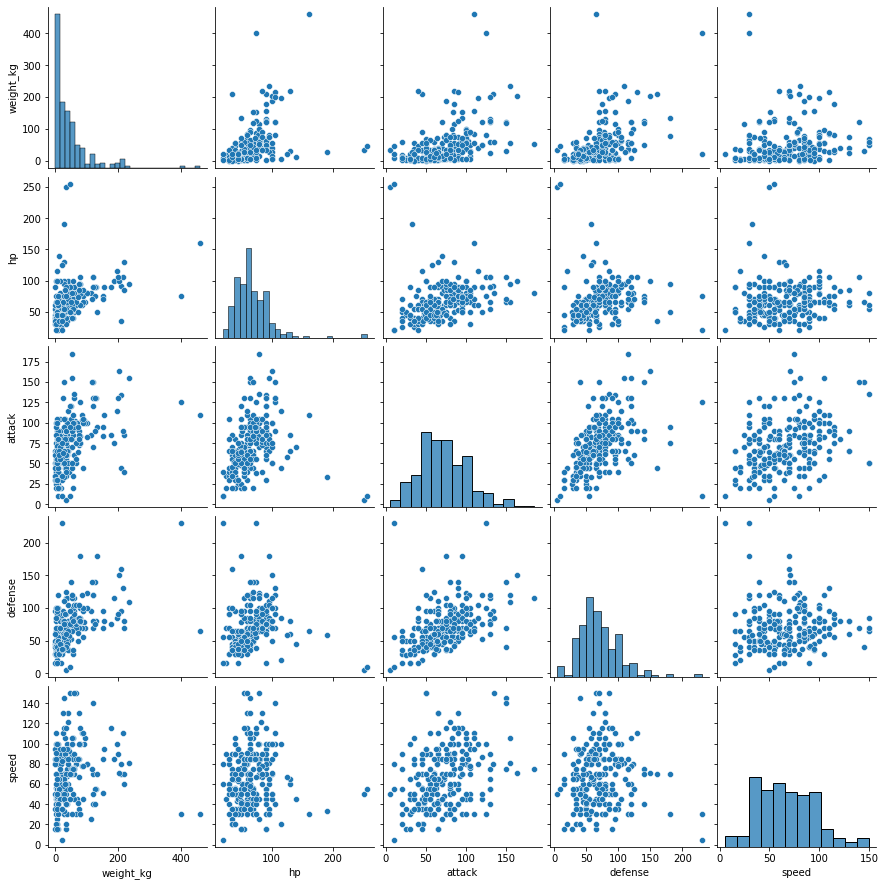

In [55]:
#Create scatterplots of the data
continuous_variables = pokemon[["weight_kg", "hp", "attack", "defense", "speed"]]
sns.pairplot(continuous_variables)
plt.show()

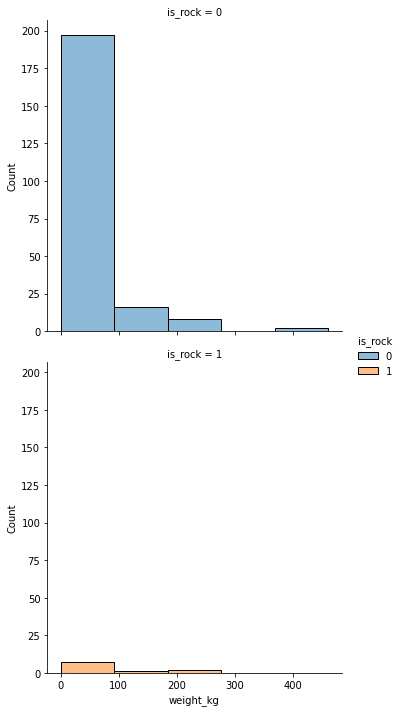

In [77]:
#Create a histogram for the response and indicator variable
sns.displot(data = pokemon, x = "weight_kg", col = "is_rock", col_wrap = 1, hue = "is_rock", legend = True, bins = 5)
plt.show()

In [80]:
#Fit the multiple linear regression model
pokelm1 = ols("weight_kg ~ hp + attack + defense + speed + is_rock", data = pokemon).fit()

#Get the estimated coefficients for the model
print(pokelm.params)
print("")

#Get the model summary
print(pokelm.summary())

Intercept   -77.176052
hp            0.611674
attack        0.424037
defense       0.624291
speed         0.117778
is_rock      12.548724
dtype: float64

                            OLS Regression Results                            
Dep. Variable:              weight_kg   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     30.32
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.45e-23
Time:                        17:11:53   Log-Likelihood:                -1228.8
No. Observations:                 233   AIC:                             2470.
Df Residuals:                     227   BIC:                             2490.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

In [81]:
pokelm2 = ols("weight_kg ~ hp + attack + defense", data = pokemon).fit()

#Get the estimated coefficients for the model
print(pokelm2.params)
print("")

#Get the model summary
print(pokelm2.summary())

Intercept   -71.506979
hp            0.600689
attack        0.473250
defense       0.623063
dtype: float64

                            OLS Regression Results                            
Dep. Variable:              weight_kg   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     50.12
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           6.11e-25
Time:                        17:13:10   Log-Likelihood:                -1229.6
No. Observations:                 233   AIC:                             2467.
Df Residuals:                     229   BIC:                             2481.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

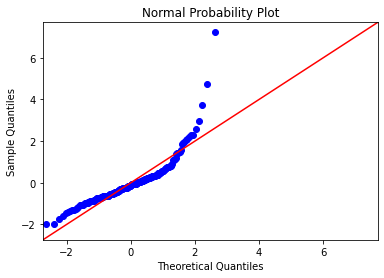

In [91]:
#QQplot
qqplot(data = pokelm2.resid, fit = True, line = "45")
plt.title("Normal Probability Plot")
plt.show()

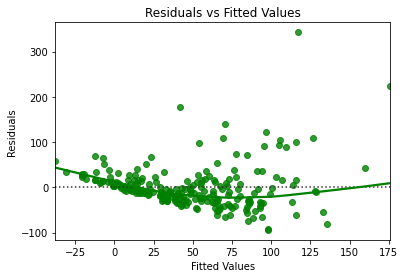

In [90]:
#Residual vs Fitted Values Plot
sns.residplot(x = pokelm2.fittedvalues, y = pokelm2.resid, data = pokemon, lowess = True, color = "green")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()